   cycle  num_cells   DoFs  estimated_error  exact_error       1/N  \
0      1       6717   6949         9.841210    12.564700  0.000144   
1      2       8475   8894         2.738720     3.883890  0.000112   
2      3      13947  14709         1.200250     1.678550  0.000068   
3      4      29322  30878         0.330336     0.556369  0.000032   
4      5      71214  74722         0.097632     0.196207  0.000013   

   err_computed+eps  
0          2.723490  
1          1.145170  
2          0.478300  
3          0.226033  
4          0.098575  


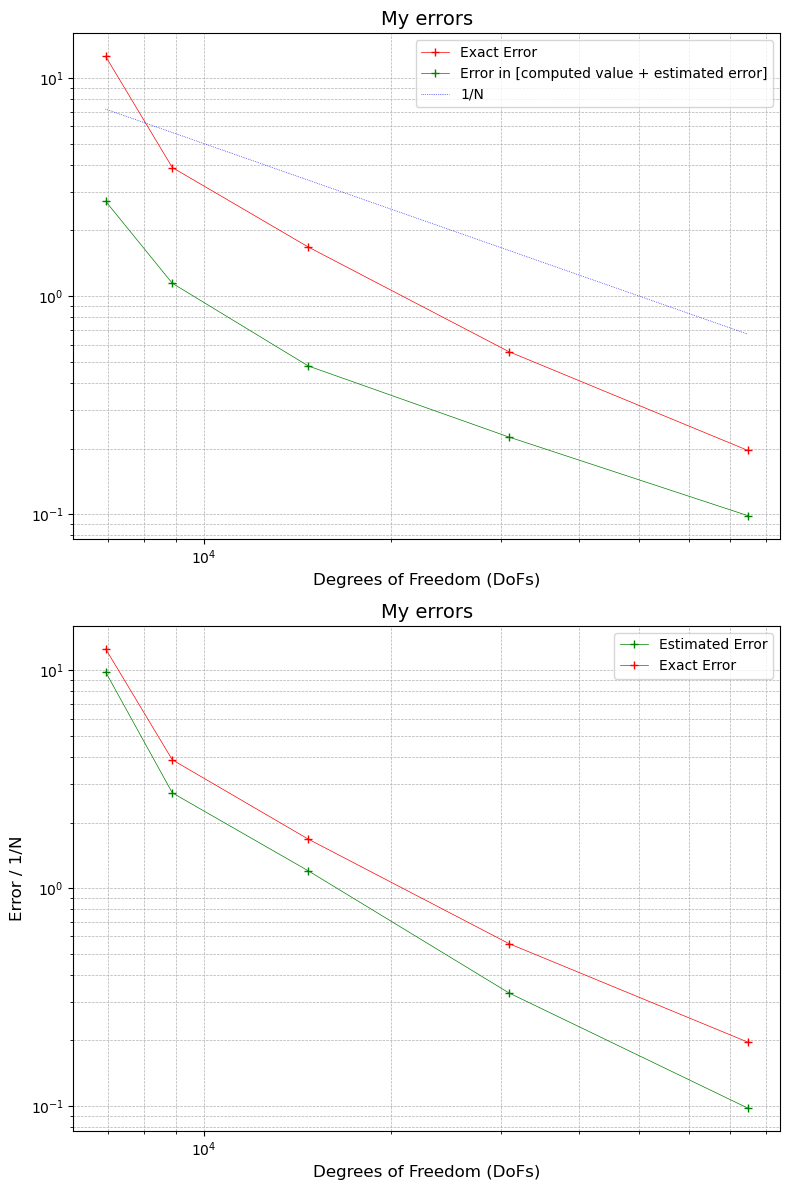

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
file_name = "/Users/matteom/shared-folder/ion_propulsion/results/GO_func8-convergence_data.csv"
data = pd.read_csv(file_name)

# Compute 1/N (1/DoFs)
data['1/N'] = 1 / data['DoFs']
data['err_computed+eps'] = abs(data['exact_error']-data["estimated_error"])
print(data)

# Create the figure
plt.figure(figsize=(8, 12))  # Adjust the figure size for two plots

# Plot 1: Original log-log plot
plt.subplot(2, 1, 1)  # First subplot (top)
plt.loglog(data['DoFs'], data['exact_error'], "r-+", linewidth=0.5, label='Exact Error')
plt.loglog(data['DoFs'], data['err_computed+eps'],"g-+", linewidth=0.5, label='Error in [computed value + estimated error]')
plt.loglog(data['DoFs'], data['1/N']*50000, "b:", linewidth=0.5, label='1/N')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('My errors', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Plot 2: Duplicate plot
plt.subplot(2, 1, 2)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['estimated_error'],"g-+", linewidth=0.5, label='Estimated Error')
plt.loglog(data['DoFs'], data['exact_error'],"r-+", linewidth=0.5, label='Exact Error')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error / 1/N', fontsize=12)
plt.title('My errors', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
